In [3]:
from IPython.display import clear_output
import random as rnd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import time
import math


#import Rounds and Game creating classes
%run RollsPlayersRounds.ipynb
#import Rule based Agent
%run RuleBasedAgent.ipynb
#import Monte Carlo Random Rollout Player
%run MCTSAgent.ipynb
#import Monte Carlo Random Rollout Player
%run ProbabilisticAgent.ipynb
    

# Experiment 2 - Parameter Tuning MCTS


In [97]:
def experiment2(scalar,scoring, rollouts = 1000, Players = 2, Random = True, 
                round_no=500, smart_rollouts = False, prob_opponent = True):
    losses = {}
    wins = {}
    t0 = time.time()
    Game = full_game(Players, Human=False, shuffle=False)
    for i in Game.Players:
        losses[i] = 0
        wins[i] = 0
    for x in range(round_no):
        first_player = rnd.choice(Game.Players)
        roundd = rounds(Game.diceState, Game.Players, first_player, Game.human, shuffle=True)
        while roundd.last != 'Dudo' and roundd.last != 'Calza':

            # Play a round
            if roundd.player != 'Lorenzo':
                if prob_opponent == True:
                    agent = probabilistic_agent(roundd.total_dice, roundd.rolls[roundd.player], 
                                                last_bid = roundd.last)
                    bid = agent.make_bid()
                else:
                    agent = rule_based_agent(roundd.rolls[roundd.player],roundd.last, 
                                             roundd.history, roundd.total_dice, roundd.Players)
                    bid = agent.make_bid()

            #Add scoring and scalar!
            elif roundd.player == 'Lorenzo':
                dice_state_opponents = Game.diceState.copy()
                del dice_state_opponents['Lorenzo']
                agent = MCTSPlayer(MOVES,scalar,len(Game.Players), roundd.rolls[roundd.player], 
                                 roundd.total_dice, roundd.Players, roundd.player, 
                                   dice_state_opponents, roundd.history, scoring,
                                   previous_bid = roundd.last, Random = Random,rollouts= rollouts,
                                  smart_rollouts = smart_rollouts)

                bid = agent.chooseMove()

            roundd.last = bid
            roundd.history.append(bid)

            #Analyse terminal bid and update dice accordingly
            if roundd.last == 'Dudo': 
                loser_winner = roundd.call()
                losses[loser_winner[0]] +=1

            elif roundd.last == 'Calza':
                loser_winner = roundd.call(Dudo = False, Calza = True)
                if loser_winner[1] == 1:
                    wins[loser_winner[0]] +=1
                else:
                    losses[loser_winner[0]] +=1
            else:
                roundd.next_player()
                
    t1 = time.time()
    time_ = t1-t0
    return losses,time_

# 1) Scalar and Scoring Function

### 1.a) Scalar = sqrt(2) and Score = [-10, 0, +1]

In [ ]:
scalar = math.sqrt(2.0)
scoring = [-10,0,+1]
losses = experiment2(scalar, scoring)[0]
names = [n for n in losses]
x = ['Prob1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 500')
plt.title('Scalar = sqrt(2) & Scoring = [-10,0,1]')
plt.savefig('Experiment 2-1a')
plt.show()

### 1b) Scalar = sqrt(2) and Scoring = [-1,0,1]

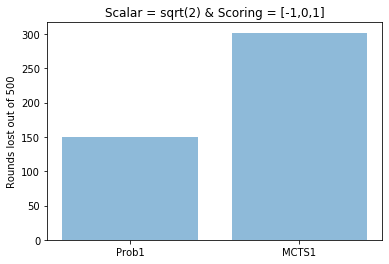

In [10]:
scalar = math.sqrt(2.0)
scoring = [-1,0,+1]
losses = experiment2(scalar, scoring)[0]
names = [n for n in losses]
x = ['Prob1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 500')
plt.title('Scalar = sqrt(2) & Scoring = [-1,0,1]')
plt.savefig('Experiment 2-1b')
plt.show()

### 1c) Scalar = sqrt(2) and Scoring = [-1,0,0]

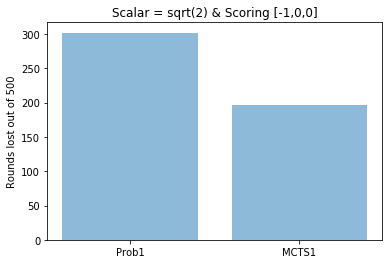

In [11]:
scalar = math.sqrt(2.0)
scoring = [-1,0,0]
losses= experiment2(scalar, scoring)[0]
names = [n for n in losses]
x = ['Prob1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 500')
plt.title('Scalar = sqrt(2) & Scoring [-1,0,0]')
plt.savefig('Experiment 2-1c')
plt.show()

### 1d) Scalar = 2 and Scoring = [-1,0,1]

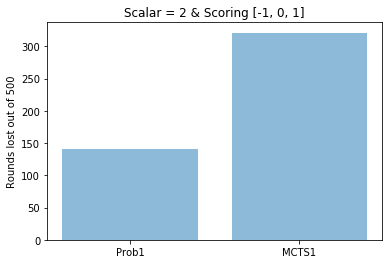

In [12]:
scalar = 2
scoring = [-1,0,1]
losses= experiment2(scalar, scoring)[0]
names = [n for n in losses]
x = ['Prob1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 500')
plt.title('Scalar = 2 & Scoring [-1, 0, 1]')
plt.savefig('Experiment 2-1d')
plt.show()

### 1e) Scalar = 2 and Scoring = [-1, 0 , 0]

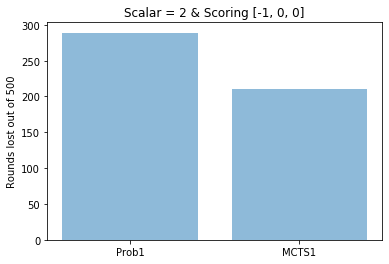

In [13]:
scalar = 2
scoring = [-1,0,0]
losses = experiment2(scalar, scoring)[0]
names = [n for n in losses]
x = ['Prob1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 500')
plt.title('Scalar = 2 & Scoring [-1, 0, 0]')
plt.savefig('Experiment 2-1e')
plt.show()

### 1f) Scalar = 2 and Scoring = [-10,0,1]

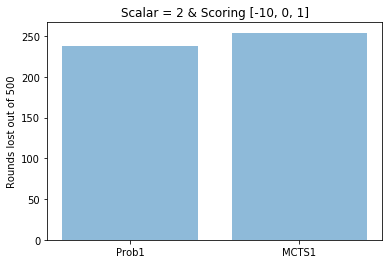

In [14]:
scalar = 2
scoring = [-10,0,1]
losses = experiment2(scalar, scoring)[0]
names = [n for n in losses]
x = ['Prob1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 500')
plt.title('Scalar = 2 & Scoring [-10, 0, 1]')
plt.savefig('Experiment 2-1f')
plt.show()

## 2) Random Rollouts 

### 2.1) 5 Opponent Dice
#### 1000 Rollouts

In [ ]:
scalar = 2
scoring = [-1,0,0]
losses, time_ = experiment2(scalar, scoring, rollouts=1000, Players = 2, round_no = 250)
names = [n for n in losses]
x = ['Prob1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 250')
plt.title('1000 Rollouts')
plt.savefig('Experiment 2-2x')
plt.show()

In [42]:
print ('time: ', time_)

time:  283.8419699668884


#### 350 Rollouts

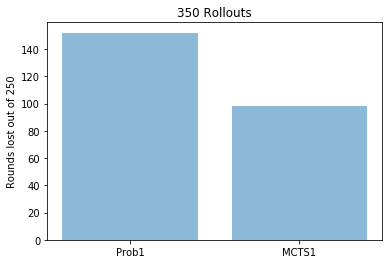

In [32]:
scalar = 2
scoring = [-1,0,0]
losses, time_ = experiment2(scalar, scoring, rollouts=350, Players = 2, round_no = 250)
names = [n for n in losses]
x = ['Prob1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 250')
plt.title('350 Rollouts')
plt.savefig('Experiment 2-2a')
plt.show()

In [33]:
print ('time: ', time_)

time:  106.9066858291626


#### 252 Rollouts

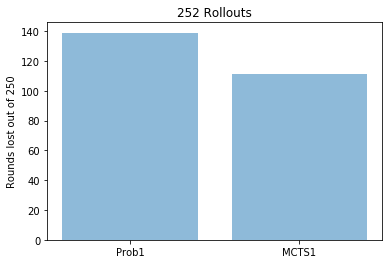

In [34]:
scalar = 2
scoring = [-1,0,0]
losses, time_ = experiment2(scalar, scoring, rollouts=252, Players = 2, round_no = 250)
names = [n for n in losses]
x = ['Prob1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 250')
plt.title('252 Rollouts')
plt.savefig('Experiment 2-2b')
plt.show()

In [35]:
print ('time: ', time_)

time:  76.02716660499573


#### 100 Rollouts

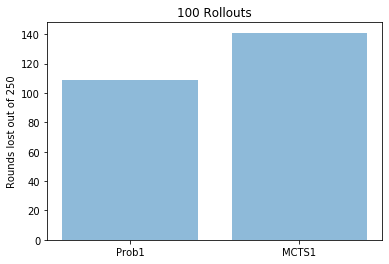

In [37]:
scalar = 2
scoring = [-1,0,0]
losses, time_ = experiment2(scalar, scoring, rollouts=100, Players = 2, round_no = 250)
names = [n for n in losses]
x = ['Prob1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 250')
plt.title('100 Rollouts')
plt.savefig('Experiment 2-2c')
plt.show()

In [38]:
print ('time: ', time_)

time:  33.66860628128052


### 2.2) More Opponent Dice

#### Smart Rollouts - 10 Opponents dice

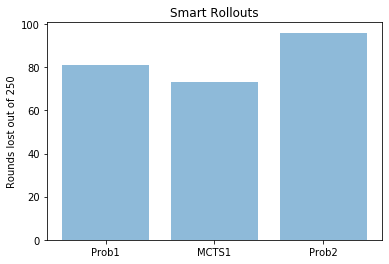

In [61]:
scalar = 2
scoring = [-1,0,0]
losses, time_ = experiment2(scalar, scoring, rollouts= 0, Players = 3, round_no = 250, 
                            smart_rollouts = True)
names = [n for n in losses]
x = ['Prob1', 'MCTS1', 'Prob2']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 250')
plt.title('Smart Rollouts')
plt.savefig('Experiment 2-2d') 
plt.show()

In [62]:
print('time: ', time_)

time:  710.1302564144135


## 3) Observer Agent Rollouts

### 3.1) Probabilistic Opponent
#### 252 Rollouts

C:\Users\anahg\anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


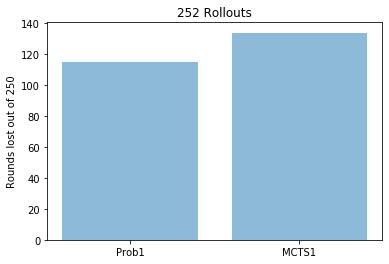

In [88]:
scalar = 2
scoring = [-1,0,0]
losses, time_ = experiment2(scalar, scoring, rollouts=252, Players =2, 
                            Random = False,round_no = 250)
names = [n for n in losses]
x = ['Prob1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 250')
plt.title('252 Rollouts')
plt.savefig('Experiment 2-3a')
plt.show()

In [89]:
print ('time: ', time_)

time:  96.7455792427063


#### 350 Rollouts

C:\Users\anahg\anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


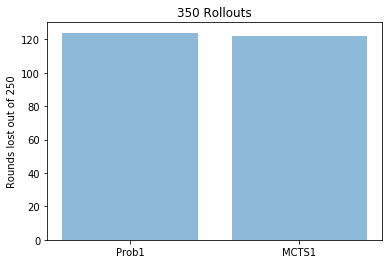

In [90]:
scalar = 2
scoring = [-1,0,0]
losses, time_ = experiment2(scalar, scoring, rollouts=350, Players = 2, 
                            Random = False,round_no = 250)
names = [n for n in losses]
x = ['Prob1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 250')
plt.title('350 Rollouts')
plt.savefig('Experiment 2-3b')
plt.show()

In [91]:
print ('time:', time_)

time: 135.79578399658203


#### 1000 Rollouts

C:\Users\anahg\anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


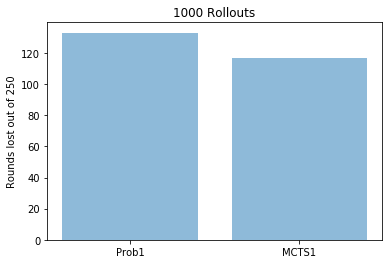

In [92]:
scalar = 2
scoring = [-1,0,0]
losses, time_ = experiment2(scalar, scoring, rollouts=1000, Players = 2, 
                            Random = False,round_no = 250)
names = [n for n in losses]
x = ['Prob1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 250')
plt.title('1000 Rollouts')
plt.savefig('Experiment 2-3c')
plt.show()

In [93]:
print ('time: ', time_)

time:  446.10226941108704


#### 100 Rollouts

C:\Users\anahg\anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


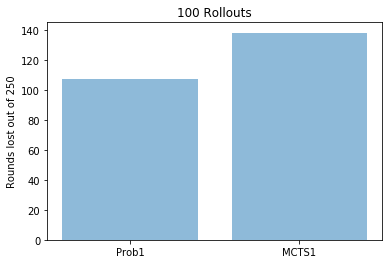

In [94]:
scalar = 2
scoring = [-1,0,0]
losses, time_ = experiment2(scalar, scoring, rollouts=100, Players = 2, 
                            Random = False,round_no = 250)
names = [n for n in losses]
x = ['Prob1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 250')
plt.title('100 Rollouts')
plt.savefig('Experiment 2-3d')
plt.show()

In [95]:
print ('time: ', time_)

time:  38.10042977333069


### 3.2) Observer Agent Opponent

C:\Users\anahg\anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


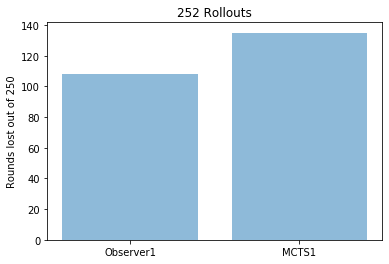

In [102]:
scalar = 2
scoring = [-1,0,0]
losses, time_ = experiment2(scalar, scoring, rollouts=252, Players =2, 
                            Random = False,round_no = 250, prob_opponent = False)
names = [n for n in losses]
x = ['Observer1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 250')
plt.title('252 Rollouts')
plt.savefig('Experiment 2-32a')
plt.show()

In [103]:
print ('time: ', time_)

time:  122.61127662658691


#### 350 Rollouts

C:\Users\anahg\anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


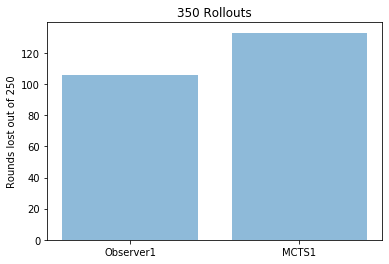

In [104]:
scalar = 2
scoring = [-1,0,0]
losses, time_ = experiment2(scalar, scoring, rollouts=350, Players = 2, 
                            Random = False,round_no = 250, prob_opponent =False)
names = [n for n in losses]
x = ['Observer1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 250')
plt.title('350 Rollouts')
plt.savefig('Experiment 2-32b')
plt.show()

In [105]:
print ('time:', time_)

time: 172.15854597091675


#### 1000 Rollouts

C:\Users\anahg\anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


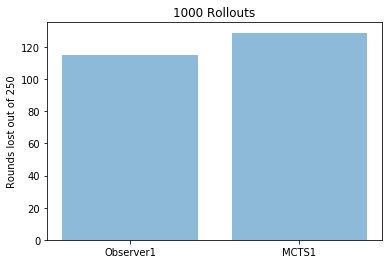

In [106]:
scalar = 2
scoring = [-1,0,0]
losses, time_ = experiment2(scalar, scoring, rollouts=1000, Players = 2, 
                            Random = False,round_no = 250, prob_opponent= False)
names = [n for n in losses]
x = ['Observer1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 250')
plt.title('1000 Rollouts')
plt.savefig('Experiment 2-32c')
plt.show()

In [107]:
print ('time: ', time_)

time:  454.35762429237366


#### 100 Rollouts

C:\Users\anahg\anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


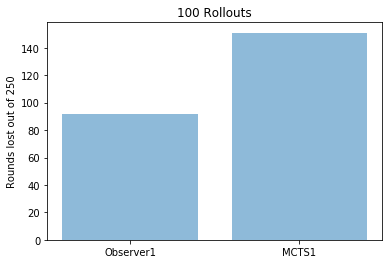

In [108]:
scalar = 2
scoring = [-1,0,0]
losses, time_ = experiment2(scalar, scoring, rollouts=100, Players = 2, 
                            Random = False,round_no = 250, prob_opponent = False)
names = [n for n in losses]
x = ['Observer1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 250')
plt.title('100 Rollouts')
plt.savefig('Experiment 2-32d')
plt.show()

In [109]:
print ('time: ', time_)

time:  37.60023307800293


### 3.3) 2000 Rollouts

C:\Users\anahg\anaconda3\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


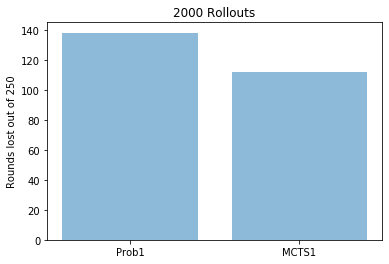

In [100]:
scalar = 2
scoring = [-1,0,0]
losses, time_ = experiment2(scalar, scoring, rollouts=2000, Players = 2, 
                            Random = False,round_no = 250)
names = [n for n in losses]
x = ['Prob1', 'MCTS1']
y_pos = np.arange(len(x))
performance = []
for i in names:
    performance.append(losses[i])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x)
plt.ylabel('Rounds lost out of 250')
plt.title('2000 Rollouts')
plt.savefig('Experiment 2-3e')
plt.show()

In [101]:
print ('time: ', time_ )

time:  1166.2536823749542
